<a href="https://colab.research.google.com/github/kainat-Baloch/LinearRegressionfromscrath/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from fbprophet import Prophet

In [13]:
df = pd.read_csv('/project_data.csv')
df.head() 

,ds,STOCK_PRESENT,REFILLING,y,REMAIN_STOCK
0,2019-01-01,3108,0,2628,480
1,2019-01-02,480,8000,2874,5606
2,2019-01-03,5606,0,2856,2750
3,2019-01-04,2750,0,2594,156
4,2019-01-05,156,5000,2568,2588


In [31]:
X = df[['ds', 'y']]

In [33]:
X

,ds,y
0,2019-01-01,2628
1,2019-01-02,2874
2,2019-01-03,2856
3,2019-01-04,2594
4,2019-01-05,2568
...,...,...
360,2019-12-27,1993
361,2019-12-28,2056
362,2019-12-29,2530
363,2019-12-30,2193


In [29]:
df.ds

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
360    2019-12-27
361    2019-12-28
362    2019-12-29
363    2019-12-30
364    2019-12-31
Name: ds, Length: 365, dtype: object

In [34]:
Model = Prophet()
Model.fit(X)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = Model.make_future_dataframe(periods=30)
future.tail()

,ds
390,2020-01-26
391,2020-01-27
392,2020-01-28
393,2020-01-29
394,2020-01-30


In [38]:
forecast = Model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
390,2020-01-26,2738.431963,2217.918646,3234.382978
391,2020-01-27,2662.986805,2179.256234,3197.133024
392,2020-01-28,2871.926548,2407.431045,3397.247090
393,2020-01-29,2635.705565,2122.250792,3117.917359
394,2020-01-30,2579.030257,2056.156784,3080.099117


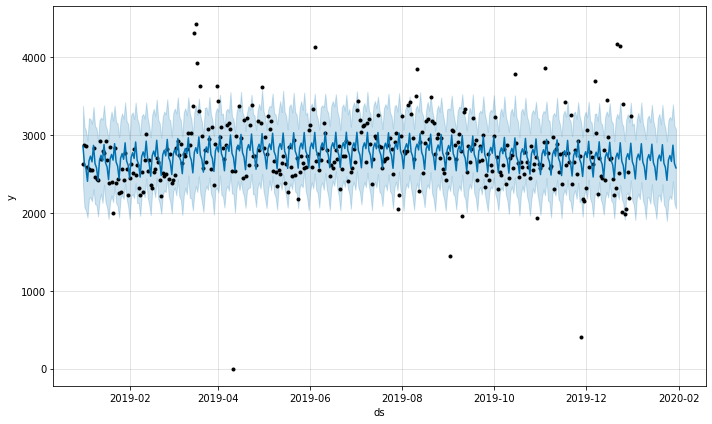

In [39]:
fig1 = Model.plot(forecast)


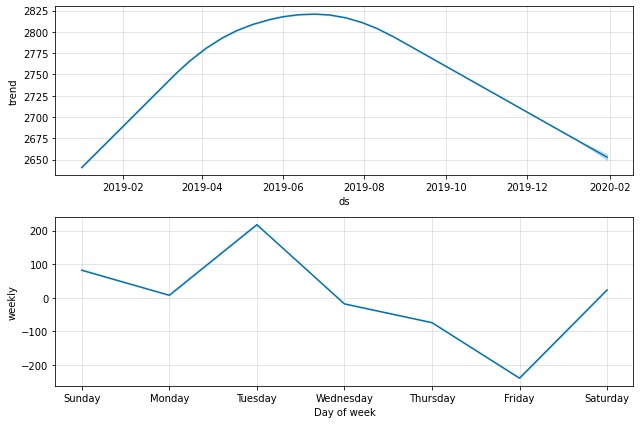

In [40]:
fig2 = Model.plot_components(forecast)


In [42]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(Model, forecast)

In [44]:
plot_components_plotly(Model, forecast)
